In [29]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
'''
Load data
'''
X_digits, y_digits = load_digits(return_X_y=True)

In [30]:
'''
Split data into train and test set
'''
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [31]:
'''
Let us assume we only have 50 samples with data, use them to train the model
Then test the accuracy
'''
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8333333333333334

In [32]:
'''
Now let us use KMeans to split data into 50 clusters
'''
K = 50
kmeans = KMeans(n_clusters = K, random_state = 42)
X_digits_distance = kmeans.fit_transform(X_train)

In [33]:
'''
Now for each instance we have a distance for each centroid
'''
X_digits_distance.shape

(1347, 50)

In [34]:
'''
We use argmin to find the minimum distance along row axis(axis = 0). 
Each column represents a cluster, minimum distance along row means the closet instance to the centroid of each cluster.
'''
representative_digit_index = np.argmin(X_digits_distance, axis = 0) 

In [35]:
'''
Now we have the index of closet instance for each cluster
'''
representative_digit_index

array([ 911,  559,   23,  159,  736, 1056,  776,  795,  753,  598,  737,
        683, 1194,  602,  817, 1284,   73,  702,   94,  891,  805, 1071,
       1314, 1022, 1050,  525,  588,  481, 1005,  766,  848,  731,  749,
       1322, 1336,  705, 1151,  494,  357,  459,  843,  850,  151,  256,
        576,  460,  596,  648,  841,  214], dtype=int64)

In [36]:
'''
Use the index to get the data from X_train
'''
X_representative_digits = X_train[representative_digit_index]

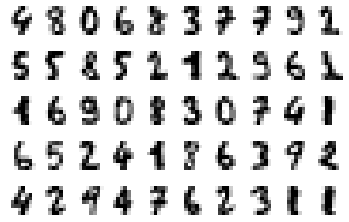

In [37]:
'''
Let us plot these digits out
'''
for i, digit in enumerate(X_representative_digits):
    plt.subplot(K // 10, 10, i + 1)
    plt.imshow(digit.reshape(8, 8), cmap = 'binary')
    plt.axis('off')
plt.show()

In [38]:
'''
Instead of manaully input all the digits, for this example, we have the label in y_train.
But in actual example, we wont have this, we will need to manaully do this.
'''
y_train[representative_digit_index]

array([4, 8, 0, 6, 8, 3, 7, 7, 9, 2, 5, 5, 8, 5, 2, 1, 2, 9, 6, 1, 1, 6,
       9, 0, 8, 3, 0, 7, 4, 1, 6, 5, 2, 4, 1, 8, 6, 3, 9, 2, 4, 2, 9, 4,
       7, 6, 2, 3, 1, 1])

In [39]:
'''
Lets pretend we input all digits by hand.
'''
y_representative_digits = np.array([4, 8, 0, 6, 8, 3, 7, 7, 9, 2, 5, 5, 8, 5, 2, 1, 2, 9, 6, 1, 1, 6,
       9, 0, 8, 3, 0, 7, 4, 1, 6, 5, 2, 4, 1, 8, 6, 3, 9, 2, 4, 2, 9, 4,
       7, 6, 2, 3, 1, 1])

In [40]:
'''
Let us train the model again using 50 samples.
But this time we use the closet instance to each cluster which we name as representative digits
'''
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9222222222222223

In [41]:
'''
Now let us try to propagate the labels for all instances
We get the number of cluster from kmeans.labels_
Map it to the y_representative_digits
Assign the return label to that instance
'''
y_train_propagated = np.empty(len(X_train))
for i in range(len(y_train_propagated)):
    cluster = kmeans.labels_[i]
    y_train_propagated[i] = y_representative_digits[cluster]

In [42]:
'''
Now we get all labels for our traing instances.
'''
y_train_propagated

array([5., 2., 0., ..., 2., 7., 1.])

In [43]:
'''
Let us train the model again
'''
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [44]:
'''
We got a pretty decent accuracy with only 50 labeled instances
'''
log_reg.score(X_test, y_test)

0.9333333333333333

## Reference:
Example from Hands-On Machine Learning with Scikit-Learn and TensorFlow